peak22855_SES1/t:
25832739 25833669
1.9843137254901961
2.0
1.3725490196078431
1.8196078431372549


/tmp/ipykernel_144817/1208479067.py:229: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, arrows=False, style='solid', edge_color=edge_colors, ax=axes)


2391.392142853724
2583.20172097845
2583.201720984302
2583.201720984302


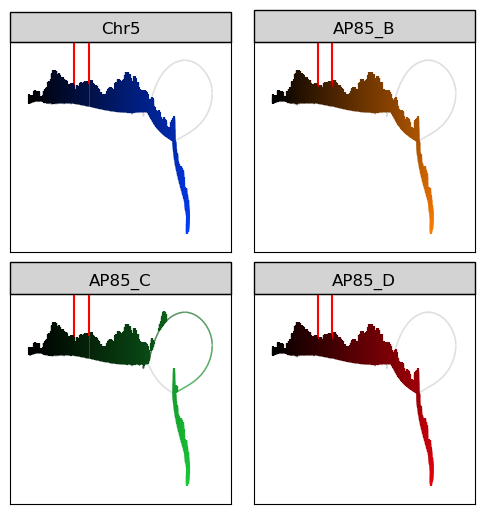

In [30]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
"""
@FileName: 2-3.py
@Time: 2023/8/24,21:48
@Author: Zhang Yixing
"""


import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import math
from matplotlib.colors import to_hex
import matplotlib
import matplotlib.colors
import seaborn as sns
import matplotlib.colors
import matplotlib.colors as mcolors
import random
import numpy as np

def df(links, head, tail):
    """ 给连接关系a->b,形成一个图。返回图中head与tail之间的节点,功能类似于ogdi extract,获得subgraph"""
    #G = nx.DiGraph()
    #G.add_edges_from(links)

    # 使用networkx的所有简单路径功能查找从node1到node3的所有路径
    #paths = list(nx.all_simple_paths(G, source=head, target=tail))
    
    a = set()
    #print (links)
    
    for i in links:
        for j in i:
            if int(j) >= int(head) and int(j) <= int(tail):
                a.add(j)
    
    #for path in paths:
    #    for i in path:
    #        a.add(i)
    return a


def is_grayish(color):
    r, g, b = color
    color_distance = abs(r - g) + abs(g - b) + abs(b - r)
    print(color_distance)
    return color_distance < 0.1


def generate_new_color(existing_colors):
    while True:
        new_color = 0.3 + (1-0.5) * random.random(), 0.3 + (1-0.5) * random.random(), 0.3 + (1-0.5) * random.random() # Generate random RGB color
        if not is_grayish(new_color):
            color_distances = [abs(ec[0] - new_color[0]) + abs(ec[1] - new_color[1]) + abs(ec[2] - new_color[2]) for ec in existing_colors]
            if all(distance > 0.3 for distance in color_distances):  # Adjust the threshold as needed
                return new_color


class Colors:
    def __init__(self, n):
        self.n = n
        self.colors = self.get_colors()

    def get_colors(self):
        if self.n <= 10:
            palette = "bright"  # set color https://seaborn.pydata.org/tutorial/color_palettes.html
        elif self.n <= 20:
            palette = "tab20"
        else:
            palette = "hls"
        colors = sns.color_palette(palette, n_colors=self.n )
        filtered_colors = [c for c in colors if not is_grayish(c)]

        while len(filtered_colors) < self.n :
            new_color = generate_new_color(filtered_colors)
            filtered_colors.append(new_color)

        return filtered_colors  # Take the first n colors

    def to_hex(self):
        colors_hex = [matplotlib.colors.to_hex(c) for c in self.colors]
        return colors_hex

    def to_rgb(self):
        colors_hex = self.to_hex()
        colors_rgb = [matplotlib.colors.hex2color(hex_color) for hex_color in colors_hex]
        return colors_rgb

def generate_gradient_colors(center_color_hex, n):
    def interpolate_color(color1_hex, color2_hex, ratio):
        # 将十六进制颜色代码转换为RGB颜色
        color1 = np.array(hex_to_rgb(color1_hex))
        color2 = np.array(hex_to_rgb(color2_hex))
        
        # 计算插值颜色的RGB值
        interpolated_color = (color1 + (color2 - color1) * ratio).astype(int)
        
        # 将插值颜色转换为十六进制颜色代码
        return rgb_to_hex(interpolated_color)
    
    def hex_to_rgb(hex_color):
        # 将十六进制颜色代码转换为RGB颜色
        hex_color = hex_color.lstrip('#')
        return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

    def rgb_to_hex(rgb_color):
        # 将RGB颜色转换为十六进制颜色代码
        return '#{:02x}{:02x}{:02x}'.format(*rgb_color)
    
    # 将中心颜色从十六进制颜色代码转换为RGB颜色
    center_color_rgb = hex_to_rgb(center_color_hex)
    
    # 插值两个颜色之间的颜色
    interpolated_colors = []
    for i in range(n):
        # 计算插值比例
        ratio = i / (n - 1)
        
        # 插值颜色
        interpolated_color = interpolate_color(center_color_hex, '#000000', ratio)
        
        interpolated_colors.append(interpolated_color)
    
    return interpolated_colors

# 再将node划分子node,来实现它的长度
def generate_new_edge(fig, nodes, links, hapcov, value, set_color, axes, bases_unit, ns, highlight, first, pos):
    #print ("...")
    from pygraphviz import AGraph
    A = AGraph()
    #bases_unit = 2
    bases_unit_length = 0.5
    tem = {}
    unique_list = []
    nnode = 0
    nedge = 0
    
    for v in links.values():
        #if v not in unique_list:
        unique_list.extend(v)
        
    unique_list = [list(x) for x in set(tuple(x) for x in unique_list)]

    #print (unique_list)
    for node, length in nodes.items():
        numbers = math.ceil(length / bases_unit)
        if numbers <= 1:
            numbers = 1
        tem[node] = numbers
        sub_nodes = [f'{node}_{i}' for i in range(1, numbers + 1)]
        
        nodecolor = "set" if node in value[1] else '#D3D3D3'
        
        for nn in sub_nodes:
            A.add_node(nn, size=hapcov[str(node)], shape="s", color=nodecolor)
            if nodecolor == "set":
                nnode += 1
        for i in range(0, len(sub_nodes) - 1):
            if node in value[1]:
                A.add_edge(sub_nodes[i], sub_nodes[i + 1], len=bases_unit_length, color="set")
                nedge += 1
            else:
                A.add_edge(sub_nodes[i], sub_nodes[i + 1], len=bases_unit_length, color='#D3D3D3')

    
    # 增加node和node之间的连接
    for i in unique_list:
        ii, jj = i
        node1 = f'{ii}_{tem[ii]}'
        node2 = f'{jj}_1'
        
        #if ii in value[1] and jj in value[1]:
        if i in links[value[0]]:
            A.add_edge(node1, node2, len=bases_unit_length, color="set")
            nedge += 1
        else:
            A.add_edge(node1, node2, len=bases_unit_length, color='#D3D3D3')
            
    G = nx.nx_agraph.from_agraph(A)
    
    n_colors = generate_gradient_colors(set_color, nnode)
    e_colors = generate_gradient_colors(set_color, nedge)
    #print (nedge)
    en = 0
    for u, v in G.edges():
        if A.get_edge(u, v).attr['color'] == "set":
            G[u][v]['color'] = e_colors[en]
            en += 1
        else:
            G[u][v]['color'] = A.get_edge(u, v).attr['color']
    #edge_colors = [G[u][v]['color'] for u, v in G.edges()]
    #print (en)
    nn = 0
    for nt in G.nodes():
        #print (nt)
        G.nodes[nt]['size'] = A.get_node(nt).attr['size']
        if A.get_node(nt).attr['color'] == "set":
            G.nodes[nt]['color'] = n_colors[nn]
            nn += 1
        else:
            G.nodes[nt]['color'] = A.get_node(nt).attr['color']
    
    if highlight != False:
        for h in highlight:
            h = h + "_1"
            G.nodes[h]['color'] = "red"
            G.nodes[h]['size'] = 10000
        
    edge_colors = [G[u][v]['color'] for u, v in G.edges()]
    node_sizes = [float(G.nodes[nt]['size']) for nt in G.nodes()]
    node_colors = [G.nodes[nt]['color'] for nt in G.nodes()]
    
    #print (edge_colors)
    node_alphas = []
    for i in G.nodes():
        #print (i)
        i = i.split("_")[0]
        ap = 1 if i in value[1] else 0
        node_alphas.append(ap)
    
    if first == 1:
        pos = nx.nx_agraph.graphviz_layout(G)

    # node shapes : https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, alpha=node_alphas, node_shape=ns,
            node_color=node_colors, ax=axes)
    nx.draw_networkx_edges(G, pos, arrows=False, style='solid', edge_color=edge_colors, ax=axes)
    axes.set_axis_on()
    
    
    # 设置背景
    # 绘制图形以更新画布
    title = value[0]
    title_obj = axes.set_title(title)
    fig.canvas.draw()

    # 获取Y坐标轴的像素长度
    y_axis_length_pixels = axes.transData.transform([0, 1]) - axes.transData.transform([0, 0])
    y_pixel_to_length_ratio = y_axis_length_pixels[1]  # Y轴像素长度与Y坐标轴长度的比例

    # 获取标题的边界框
    title_bbox = title_obj.get_window_extent(fig.canvas.renderer)

    # 计算标题的Y坐标轴对应的长度
    title_height_y_coords = title_bbox.height / y_pixel_to_length_ratio
    # axes.set_facecolor('lightgray')

    print(title_height_y_coords)
    x_range = axes.get_xlim()
    y_range = axes.get_ylim()
    axes.add_patch(
        plt.Rectangle((x_range[0], y_range[1]), x_range[1] - x_range[0], int(title_height_y_coords) * 2, fc='#D3D3D3',
                      ec='black', clip_on=False,
                      linewidth=1))
    return pos

def get_n_colors(n):
    """获取n个离散的颜色."""
    colors = Colors(n)
    return colors.to_hex()


def main(id):
    node1 = "237894"
    node2 = "238507"
    
    
    hap_node = defaultdict(set)
    
    #id = "LA-2/peak1144"
    
    hapcov = {}
    with open(id + '.cov') as f:
        _, *ff = f
        for i in ff:
            i = i[:-1].split("\t")
            #print (i)
            hapcov[i[0]] = float(i[1])*13
    
    node1=10000000000
    node2=1
    with open(id + '.nodehap') as depth:
        for lines in depth:
            line = lines.strip().split()
            hap_node[line[1]].add(line[0])
            if int(line[0]) < node1:
                node1 = int(line[0])
            if int(line[0]) > node2:
                node2 = int(line[0])

    print (node1, node2)
    
    #node1 = "2290339"
    #node2 = "2291528"
    
    length_node = {}
    links = {} # use dict to store haplotype-level links

    with open(id + '.gfa') as gfa:
        for lines in gfa:
            if lines.startswith("S"):
                line = lines.strip().split()
                length_node[line[1]] = len(line[2])
            elif lines.startswith("P") or lines.startswith("W"): # use links info of hap level from path or walk line
                line = lines.strip().split()
                pp = line[1]
                links[pp] = []
                ll = line[2].split(",")
                for i in range(len(ll)-1):
                    links[pp].append([ll[i][:-1], ll[i+1][:-1]])

    # create links from sorted node list if some paths have no "P"/"W" line in gfa file
    for i in hap_node:
        if i not in links:
            links[i] = []
            sorted_list = sorted(hap_node[i])
            for t in range(len(sorted_list) - 1):
                links[i].append([sorted_list[t], sorted_list[t+1]])
                    
    # combined all links from different paths
    all_lists = []
    for value in links.values():
        #print (value)
        if value not in all_lists:
            all_lists.extend(value)
    
    #print ("...")

    #print (hap_node)
    n = len(hap_node)
    cols = 2
    rows = math.ceil(n / cols)
    #print (rows)
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(6, 6))
    colors = get_n_colors(n)
    # 将不需要的子图关闭
    
    #print ("...")
    sub_node = df(all_lists, node1, node2)
    #print(sub_node)
    sub_length_node = {k: v for k, v in length_node.items() if k in sub_node}
    
    sub_links = {}
    for i in links:
        sub_links[i] = []
        for j in links[i]:
            if j[0] in sub_node and j[1] in sub_node:
                sub_links[i].append([j[0],j[1]])
                
    sub_hap_node = defaultdict(set)
    for i in range(n, rows * cols):
        row, col = divmod(i, 3)
        axes[row, col].axis('off')

    for k, v_set in hap_node.items():
        intersect = v_set & sub_node  # 找出交集
        if intersect:
            sub_hap_node[k] = intersect
            
    #print (axes)
    n = 1
    for index, value in enumerate(sub_hap_node.items()):
        row, col = divmod(index, cols)
        set_color = colors[index]
        ax = axes[row, col]
        #print(row, col)
        #print (value[0])
        #print (set_color)
        if n > 1:
            t = pos
        else:
            t = ""
        pos = generate_new_edge(fig, sub_length_node, sub_links, hapcov, value, set_color, ax, bases_unit = 8, ns = 2, highlight = ["25833446","25833468"], first = n, pos = t)#["2290707","2291528"])
        n += 1
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    #plt.show()
    plt.savefig("superimposed.pdf")


if __name__ == '__main__':
    #with open("cdd") as f:
    #    for i in f:
    #        i = i[:-1].split(".gfa")[0]
            i = "peak22855_SES1/t"
            print (i + ":")
            main(i)